In [1]:
import os
import numpy as np
import pandas as pd
import csv

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

import seaborn as sns
sns.set(context="paper", font_scale=1.5, rc={"lines.linewidth": 2}, font='DejaVu Serif')
#import bottleneck as bn

In [2]:
def loadFilesNamePath(directorRoot: str):
    l_files_name_path = []
    for path, subdirs, files in os.walk(directorRoot):
        for name in files:
            l_files_name_path.append(os.path.join(path, name))
    return l_files_name_path

In [3]:
def loadFile(file_name):
    with open(file_name, 'r') as f:
        file_data = f.read()
        f.close()
    return file_data.splitlines()

In [20]:
"""
========
Function Generating Barchart
========

A bar plot with errorbars and height labels on individual bars
"""
def barCharGenerator(groupListData: list, ListLabel: list, groupListLegend: list
                     , ylabel: str, xlabel: str, title: str, figSize=(15, 9)):
    N = 4
    ind = np.arange(N)  # the x locations for the groups
    width = 0.12       # the width of the bars
    #std_CoFactor = [0.01, 0.01, 0.01, 0.01]
    std_0 = [0.01, 0.01, 0.01, 0.01]
    std_1 = [0.02, 0.02, 0.02, 0.02]
    std_2 = [0.01, 0.01, 0.01, 0.01]
    std_3 = [0.02, 0.02, 0.02, 0.02]
    std_4 = [0.01, 0.01, 0.01, 0.01]
    std_5 = [0.01, 0.01, 0.01, 0.01]
    
    #Zerando os pausinhos em cima das barras
    std_0 = std_1 = std_2 = std_3 = std_4 = std_5 = [0,0,0,0]
    
    #CoFactor = groupListData[0]
    Other_0 = groupListData[0]
    Other_1 = groupListData[1]
    Other_2 = groupListData[2]
    Other_3 = groupListData[3]
    Other_4 = groupListData[4]
    Other_5 = groupListData[5]

    #Define Plot
    fig, ax = plt.subplots(figsize=figSize)

    rects1 = ax.bar(ind, Other_0, width, color='yellow', yerr=std_0)
    rects2 = ax.bar(ind + width, Other_1, width, color='olive', yerr=std_1)
    rects3 = ax.bar(ind + width*2, Other_2, width, color='darkkhaki', yerr=std_2)
    rects4 = ax.bar(ind + width*3, Other_3, width, color='darkseagreen', yerr=std_3)
    rects5 = ax.bar(ind + width*4, Other_4, width, color='lightgreen', yerr=std_4)
    rects6 = ax.bar(ind + width*5, Other_5, width, color='darkolivegreen', yerr=std_5)

    # add some text for labels, title and axes ticks
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    ax.set_xticks(ind + (width*5) / 2)
    ax.set_xticklabels(ListLabel)

    ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0], rects5[0], rects6[0]) , groupListLegend)
    
    start, end = ax.get_ylim()
    ax.yaxis.set_ticks(np.arange(start, end, 0.01))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%2.2f'))

    def autolabel(rects, mult_height):
        """
        Attach a text label above each bar displaying its height
        """
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., mult_height*height,
                    '%2.4f' % float(height),
                    ha='center', va='bottom')

    '''autolabel(rects1, 1.05)
    autolabel(rects2, 1.13)
    autolabel(rects3, 1.05)
    autolabel(rects4, 1.13)
    autolabel(rects5, 1.05)
    autolabel(rects6, 1.13)'''

    plt.show()

In [14]:
def prepraraFiles(list_file_name: list, file_path: str):    
    CoFactor_dic = {'Recall@10':0.1640,'Recall@20':0.1611, 'Recall@50':0.1842, 'Recall@100': 0.2381
                            , 'NDCG@10': 0.1675, 'NDCG@20': 0.1601, 'NDCG@50': 0.1615, 'NDCG@100': 0.1803
                            , 'MAP@10': 0.0965, 'MAP@20': 0.0780, 'MAP@50': 0.0625, 'MAP@100': 0.0593}
    file_dic = {}

    for f_name in list_file_name:
        print(f_name)
        key_name = f_name
        
        list_file_content = loadFile(file_path+f_name)
        list_file_content = list(filter(None, list_file_content))
        
        data_dic = {}

        for line in list_file_content:
            idx = list_file_content.index(line)
            line = line.replace('Test ','').replace(' ','').split(':')
            data_dic[line[0]]=float(line[1])

        file_dic[key_name]=data_dic
    return CoFactor_dic, file_dic

In [6]:
def startCoFactorValues(CoFactor_dic: dict):
    #Determinando Cofactor Dados
    listDataNdcgCoFactor = []
    listDataRecallCoFactor = []
    listDataMapCoFactor = []
    control = 0
    
    for key, value in CoFactor_dic.items():
        control = control+1
        #Armazena Recall
        if (control in np.arange(1,5)):
            listDataRecallCoFactor.append(value)
        #Armazena NDCG
        elif (control in np.arange(5,9)):
            listDataNdcgCoFactor.append(value)
        #Armazena MAP
        elif (control in np.arange(9,13)):
            listDataMapCoFactor.append(value)

    return listDataNdcgCoFactor, listDataMapCoFactor, listDataRecallCoFactor

In [23]:
def geraGraficos(Cofactor_dic: dict, file_dic: dict, firstGroupFile: bool ):
    groupListDataNDCG = []
    groupListDataRECALL = []
    groupListDataMAP = []
    listLabel = []

    ndcg_coFactor, mapCofactor, recall_coFactor = startCoFactorValues(CoFactor_dic)

    '''
    groupListDataMAP.append(mapCofactor)
    groupListDataNDCG.append(ndcg_coFactor)
    groupListDataRECALL.append(recall_coFactor)
    listLabel.append('CoFactor')'''

    #Parametros de controle
    control = 0
    contador = 0


    for key_title, value_list in file_dic.items():
        cnn_name = key_title.split('_')
        listLabel.append(key_title)

        listDataNdcg = []
        listDataRecall = []
        listDataMap = []

        for key_name, value in value_list.items():
            control = control+1

            #Armazena Recall
            if (control in np.arange(1,5)):
                listDataRecall.append(value)
            #Armazena NDCG
            elif (control in np.arange(5,9)):
                listDataNdcg.append(value)
            #Armazena MAP
            elif (control in np.arange(9,13)):
                listDataMap.append(value)

        groupListDataNDCG.append(listDataNdcg)
        groupListDataMAP.append(listDataMap)
        groupListDataRECALL.append(listDataRecall)

        control = 0

        contador = contador + 1
        if contador == 6:
            contador = 0

            barCharGenerator(groupListDataRECALL, ['@10','@20','@50','@100'], listLabel
                             , 'Scores Evaluation Metrics','Recall@k', 'Comparação CoFactor Vs '+cnn_name[0])
            
            print('Recall Values:')
            dataFrame = pd.DataFrame(groupListDataRECALL, index=['Original'
                                                                 ,'Normalizado'
                                                                 ,'Original_MatrizDensa_RandomValue'
                                                                 ,'Normalizado_MatrizDensa_RandomValue'
                                                                 ,'Original_MatrizDensa_staticValue%'
                                                                 ,'Normalizado_MatrizDensa_staticValue']
                                     , columns=['@10', '@20', '@50', '@100'])

            print(dataFrame)
            
            print('\n\n')    
            barCharGenerator(groupListDataNDCG, ['@10','@20','@50','@100'], listLabel
                             , 'Scores Evaluation Metrics','NDCG@k', 'Comparação CoFactor Vs '+cnn_name[0])
            print('NDCG Values:')
            
            dataFrame = pd.DataFrame(groupListDataNDCG, index=['Original'
                                                             ,'Normalizado'
                                                             ,'Original_MatrizDensa_RandomValue'
                                                             ,'Normalizado_MatrizDensa_RandomValue'
                                                             ,'Original_MatrizDensa_staticValue%'
                                                             ,'Normalizado_MatrizDensa_staticValue']
                                     , columns=['@10', '@20', '@50', '@100'])
            print(dataFrame)

            print('\n\n')    
            barCharGenerator(groupListDataMAP, ['@10','@20','@50','@100'], listLabel
                             , 'Scores Evaluation Metrics','MAP@k', 'Comparação CoFactor Vs '+cnn_name[0])
            print('MAP Values:')
            dataFrame = pd.DataFrame(groupListDataMAP, index=['Original'
                                                             ,'Normalizado'
                                                             ,'Original_MatrizDensa_RandomValue'
                                                             ,'Normalizado_MatrizDensa_RandomValue'
                                                             ,'Original_MatrizDensa_staticValue%'
                                                             ,'Normalizado_MatrizDensa_staticValue']
                                     , columns=['@10', '@20', '@50', '@100'])
            print(dataFrame)

            groupListDataNDCG.clear()
            groupListDataRECALL.clear()
            groupListDataMAP.clear()
            listLabel.clear()

In [10]:
file_path = 'BaseLine_ds/'

Nós Gráficos apresentados nesse documento são apresentados alguns experimentos aplicados ao DataSet do BaseLine.

#### Descritivo dos DataSet's

1 - Orig_Cofactor: Compreende o DataSet Original. Possui valores que vão de 0 até o infinito. Quanto maior o valor maior a correlação entre os itens. Trata-se de um DataSet esparso, ou seja, é formado em sua maioria por valores nulos (0)

2 -  Norm_Cofactor: É uma normalização dos Dados do DataSet original. Os valores estão entre 0 e 1, quanto mais próximo de um for o valor, maior será a correlação entre os itens.

3 - Orig_DenseMatrix_RandomValue: Trata-se de uma modificação no DataSet original para torna-ló Denso, ou seja, é formado em sua maioria por valores não nulos (diferente de 0). Os valores que substituiem os nulos são gerados aleatoriamente.

4 - Norm_DenseMatrix_RandomValues: Trata-se de uma modificação no DataSet original para torna-ló Denso, ou seja, é formado em sua maioria por valores não nulos (diferente de 0). Os valores que substituiem os nulos são gerados aleatoriamente. Uma vez que o DataSet se torna denso ele é NORMALIZADO.

5 - Orig_DenseMatrix_05Values: Trata-se de uma modificação no DataSet original para torna-ló Denso, ou seja, é formado em sua maioria por valores não nulos (diferente de 0). Os valores que substituiem os nulos são fixados em 5.

6 - Norm_DenseMatrix_05Values: Trata-se de uma modificação no DataSet original para torna-ló Denso, ou seja, é formado em sua maioria por valores não nulos (diferente de 0). Os valores que substituiem os nulos são fixados em 5. Uma vez que o DataSet se torna denso ele é NORMALIZADO.

#### Resultados
Excetuando os resultados encontrado para o DataSet "5" que teve um desempenho muito ruim comparado ao BaseLine, todos os outros experimentos obtiveram resultados satisfatórios.

É possível verificar com os resultados que normalizar os dados tem uma influência bastante pequena sobre os resultados. Um  DataSet Denso porém normalizado tem resultados tão bom quanto o original.

## Gráficos CoFactor BaseLine Testes

Orig_Cofactor
Norm_Cofactor
Orig_DenseMatrix_RandomValue
Norm_DenseMatrix_RandomValues
Orig_DenseMatrix_05Values
Norm_DenseMatrix_05Values


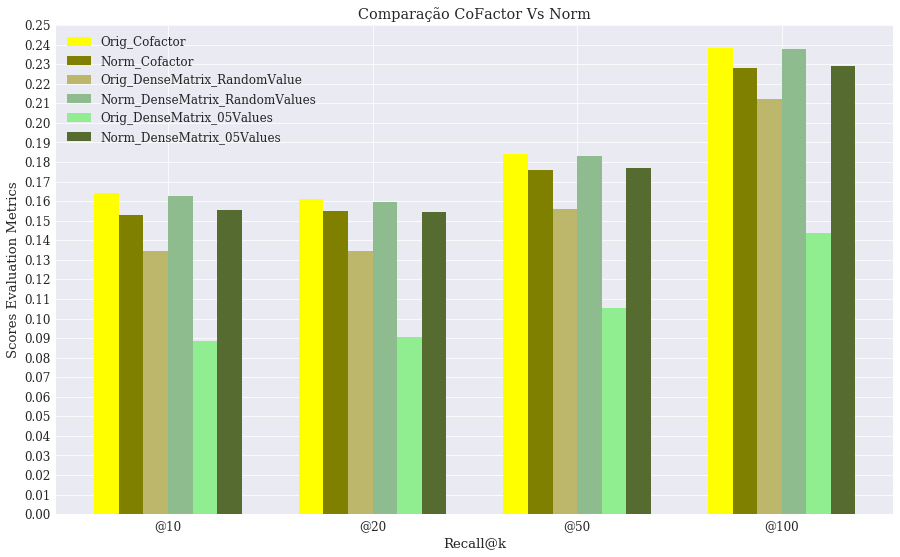

Recall Values:
                                        @10     @20     @50    @100
Original                             0.1640  0.1611  0.1842  0.2381
Normalizado                          0.1530  0.1547  0.1758  0.2282
Original_MatrizDensa_RandomValue     0.1343  0.1345  0.1559  0.2120
Normalizado_MatrizDensa_RandomValue  0.1628  0.1593  0.1828  0.2377
Original_MatrizDensa_staticValue%    0.0886  0.0904  0.1053  0.1439
Normalizado_MatrizDensa_staticValue  0.1553  0.1543  0.1767  0.2291





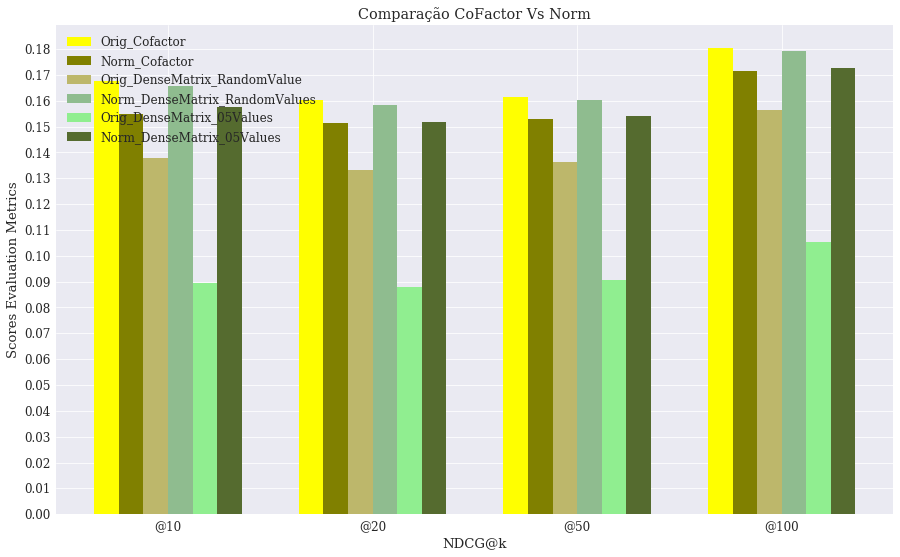

NDCG Values:
                                        @10     @20     @50    @100
Original                             0.1675  0.1601  0.1615  0.1803
Normalizado                          0.1549  0.1512  0.1531  0.1714
Original_MatrizDensa_RandomValue     0.1379  0.1332  0.1364  0.1565
Normalizado_MatrizDensa_RandomValue  0.1658  0.1582  0.1601  0.1792
Original_MatrizDensa_staticValue%    0.0895  0.0878  0.0908  0.1053
Normalizado_MatrizDensa_staticValue  0.1575  0.1519  0.1542  0.1726





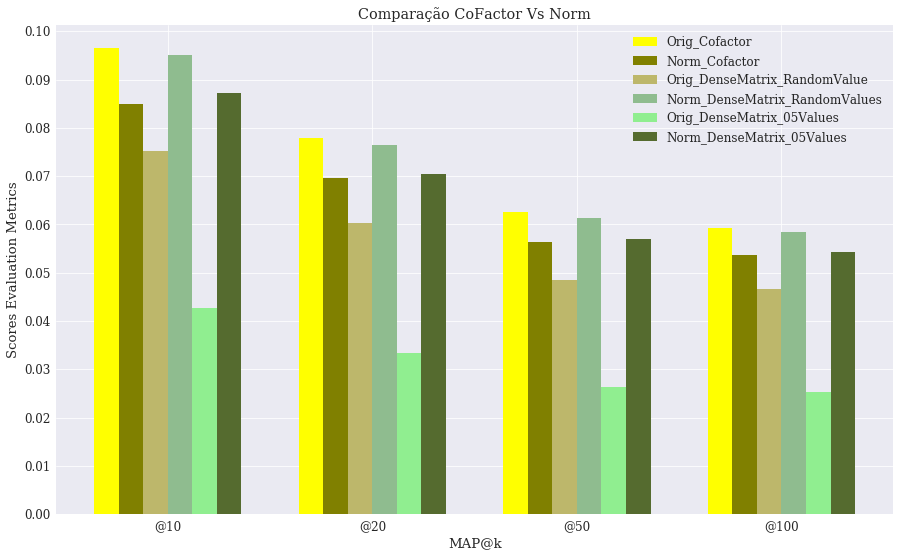

MAP Values:
                                        @10     @20     @50    @100
Original                             0.0965  0.0780  0.0625  0.0593
Normalizado                          0.0850  0.0696  0.0563  0.0536
Original_MatrizDensa_RandomValue     0.0753  0.0603  0.0485  0.0467
Normalizado_MatrizDensa_RandomValue  0.0952  0.0764  0.0614  0.0585
Original_MatrizDensa_staticValue%    0.0427  0.0334  0.0263  0.0253
Normalizado_MatrizDensa_staticValue  0.0873  0.0705  0.0569  0.0542


In [24]:
list_file_name = ['Orig_Cofactor'
                    ,'Norm_Cofactor'
                    ,'Orig_DenseMatrix_RandomValue'
                    ,'Norm_DenseMatrix_RandomValues'
                    ,'Orig_DenseMatrix_05Values'
                    ,'Norm_DenseMatrix_05Values']

CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, True)

-------------------------------------------------------------------------------------------------------------------